# Projet 8


In [1]:
import CoolProp.CoolProp as CP
import pandas as pd
from CoolProp.Plots import PropertyPlot 
import matplotlib.pyplot as plt
import CoolProp.Plots as CPp

### Constantes

In [2]:
fluid = "cyclopentane"
ma = 1 #débit d'air en kg/s
Ta1 = 350 + 273 #temperature d'entrée du fluide
Tf1 = 260+273 #température du fluide au point de fonctionnement 1
Pf1 = 2500000 #pression au point de fonctionnement 1
Tf2sv = 40 + 273 #température du fluide 
pinch = 30 #pincement
eta = 0.7 #rendement pompe/turbine
ref = 3 

ca = CP.PropsSI('Cpmass', 'T', Ta1, 'P', 1e5, 'Air') #capacité calorifique de l'air (varie avec la température mais on la considère constante ??)

# 1. Etude général du système

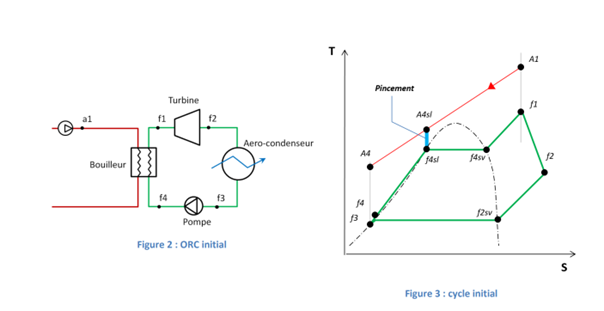

### $ \underline{Point\ \ de \ \ fonctionnement\ \ 1 \ \ :}$ 
Nous connaissons complétement l’Etat 1 du cycle, connaissant la pression et la température. 

$
P1=2500000 \\
T1=533 \\
h1= \\
s1= $

In [3]:
#point 1
hf1 = CP.PropsSI('H', 'P', Pf1, 'T', Tf1, fluid) 
sf1 = CP.PropsSI('S', 'P', Pf1, 'T', Tf1, fluid)
print(f"Au point 1: T={Tf1}, P={Pf1}, h={hf1}, s={sf1}")

Au point 1: T=533, P=2500000, h=733209.5708577671, s=1669.6809075735964


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 2 \ \ :}$ 

Le fluide traverse la turbine pour atteindre le point f2. On utilise le rendement isentropique pour calculer le point théorique si la machine était réversible, puis on calcule la véritable valeur de l’enthalpie pour atteindre le point réel. 
(Rem : il nous manque pour l’instant une valeur pour
 calculer le point f_(2,is) et donc pour calculer le point f_2)

η=(h_2-h_1)/(h_(2,is)-h_1 ) 	donne 		h_2=η(h_(2,is)-h_1 )+h_1

Pour atteindre les valeurs du point f_(2,sv), sachant que l’on connait T_(f_(2,sv) ), il suffit de se placer à pression saturante.
P_(f_(2,sv) )=P_sat (T_(f_(2,sv) ))
Ceci nous permet aussi de calculer le point f_2. En effet, le point f_(2,sv) est un point théorique où la première goutte de liquide se forme dans le condenseur. En supposant la transformation 12 isobare,  on a donc P_(f_2 )=P_(f_(2,sv) ). Ainsi, on obtient le point f_(2,is) en suivant l’isentrope du point f_1 jusqu’à atteindre la pression P_(f_2 ).





In [4]:
Pf2 = CP.PropsSI('P', 'Q', 1, 'T', Tf2sv, fluid) #pression lors de la transformation 2->3 (isobare)

hf2isen = CP.PropsSI('H', 'S', sf1, 'P', Pf2, fluid) #on se base sur l'entropie du point 1 car transformation isentropique
hf2 = hf1 + eta*(hf2isen - hf1)

Tf2 = CP.PropsSI('T', 'P', Pf2, 'H',hf2, fluid)
sf2 = CP.PropsSI('S', 'P', Pf2, 'H',hf2, fluid)

print(f"Au point 2: T={Tf2}, P={Pf2}, h={hf2}, s={sf2}")

Au point 2: T=452.25574857119557, P=73593.5325017538, h=603360.6786208467, s=1796.9060614907478


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 2sv \ \ :}$ 



In [5]:
hf2sv = CP.PropsSI('H', 'P', Pf2, 'Q', 1, fluid) 
sf2sv = CP.PropsSI('S', 'P', Pf2, 'Q', 1, fluid)
print(f"Au point 2sv: T={Tf2sv}, P={Pf2}, h={hf2sv}, s={sf2sv}")

Au point 2sv: T=313, P=73593.5325017538, h=378072.1602142715, s=1208.8707115690916


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 2sl \ \ :}$
La transformation entre le point f_(2,sv) et le point f_(2,sl) se fait via l’aérocondenseur ce qui se traduit par une transformation isobare et isotherme.
T_(f_(2,sl) )=T_(f_(2,sv) )


In [6]:
Tf2sl=Tf2sv
sf2sl = CP.PropsSI('S', 'P', Pf2, 'Q', 0, fluid)
hf2sl = CP.PropsSI('H', 'P', Pf2, 'Q', 0, fluid)
print(f"Au point 2sl: T={Tf2sv}, P={Pf2}, h={hf2sl}, s={sf2sl}")

Au point 2sl: T=313, P=73593.5325017538, h=-18012.70971353699, s=-56.576157210376394


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 3 \ \ :}$
Puis, on refroidit le liquide pour s'assurer que la totalité du fluide est sous phase liquide : on atteint ainsi le point f_3.
T_(f_3 )=T_(f_(2,sl) )-ref
De plus, le point 3 est à la pression de 2 car transformation isobare via l'aérocondenseur
P_(f_3 )=P_(f_2 )


In [7]:
Pf3 = Pf2
Tf3 = Tf2sv - 3
hf3 = CP.PropsSI('H', 'P', Pf3, 'T',Tf3, fluid)
sf3 = CP.PropsSI('S', 'P', Pf3, 'T',Tf3, fluid)
print(f"Au point 3: T={Tf3}, P={Pf3}, h={hf3}, s={sf3}")

Au point 3: T=310, P=73593.5325017538, h=-23654.141922900813, s=-74.68671359970935


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 4 \ \ :}$

La pompe amène ensuite le liquide du point 3 au point 4. De même que pour la turbine, on utilise le rendement isentropique de la turbine pour calculer le point théorique si la pompe était parfaite. De plus, pour passer du point 4 au point 1, le fluide passe dans un bouilleur : la transformation est donc isobare.
P_(f_4 )=P_(f_(4,sl) )=P_(f_(4,sv) )=P_(f_1 )
Pour calculer, les valeurs du point f_(4,is), on suit donc l’isentrope du point 3 jusqu’à atteindre la pression P_(f_1 ). On applique par la suite la définition du rendement isentropique pour calculer le point réel. 
h_4=1/η (h_(4,is)-h_3 )+h_3
P_(f_4 )=P_(f_(4,is) )=P_(f_1 )


In [8]:
Pf4 = Pf1

hf4isen = CP.PropsSI('H', 'S', sf3, 'P', Pf4, fluid)
hf4 = hf3 + (hf4isen - hf3)/eta

Tf4 = CP.PropsSI('T', 'P', Pf4, 'H', hf4, fluid)
sf4 = CP.PropsSI('S', 'P', Pf4, 'H',hf4, fluid)
print(f"Au point 4: T={Tf4}, P={Pf4}, h={hf4}, s={sf4}")

Au point 4: T=311.52214035928495, P=2500000, h=-18901.629487185128, s=-70.10437752522618


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 4sl \ \ :}$
Le point f_(4,sl) est un point à l’intérieur du bouilleur lorsque le liquide atteint son état de liquide saturant. 
P_(f_(4,sl) )=P_(f_1 )
T_(f_(4,sl) )=T_(liq,sat) (P_(f_(4,sl) ) )


In [9]:
Pf4sl = Pf1
Tf4sl = CP.PropsSI('T', 'Q', 0, 'P', Pf4sl, fluid)
sf4sl = CP.PropsSI('S', 'P', Pf4sl, 'Q',0, fluid)
hf4sl = CP.PropsSI('H', 'P', Pf4sl, 'Q',0, fluid)
print(f"Au point 4sl: T={Tf4sl}, P={Pf4sl}, h={hf4sl}, s={sf4sl}")

Au point 4sl: T=469.33228036620443, P=2500000, h=355394.52128325496, s=886.0454742420352


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 4sv \ \ :}$

Le point f_(4,sv) est aussi un point à l’intérieur du bouilleur. Cette fois-ci le liquide est à l’état de pression saturante.
P_(f_(4,sv) )=P_(f_1 )
T_(f_(4,sv) )=T_(vap,sat) (P_(f_(4,sv) ) )


In [10]:
Pf4sv = Pf1
Tf4sv = CP.PropsSI('T', 'Q', 1, 'P', Pf4sv, fluid)
sf4sv = CP.PropsSI('S', 'P', Pf4sv, 'Q',1, fluid)
hf4sv = CP.PropsSI('H', 'P', Pf4sv, 'Q',1, fluid)
print(f"Au point 4sv: T={Tf4sv}, P={Pf4sv}, h={hf4sv}, s={sf4sv}")

Au point 4sv: T=469.33228036620443, P=2500000, h=569238.3859757504, s=1341.6797309047993


<Figure size 640x480 with 0 Axes>

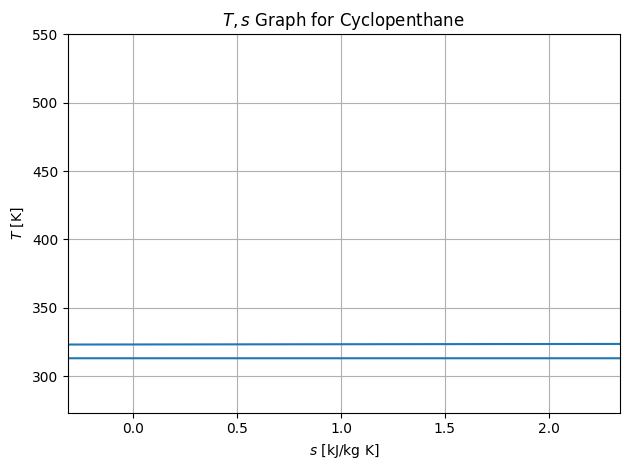

In [22]:
plt.figure()
ts_plot = PropertyPlot(fluid, 'Ts', tp_limits='ORC')
ts_plot.calc_isolines(CP.iQ, num=11)
ts_plot.title(r'$T,s$ Graph for Cyclopenthane')
ts_plot.xlabel(r'$s$ [kJ/kg K]')
ts_plot.ylabel(r'$T$ [K]')

ts_plot.grid()



# I. Construction du cycle

   ### $\underline{1. \ \ Calcul \ \ du\ \ débit \ \ du\ \ fluide\ \ :}$

Pour calculer, le débit du fluide de travail, on utilise les formules des échangeurs de chaleurs à contre courants :
M ̇C_p (T_e-T_s )= m ̇(h_s-h_e)


On utilise le point de pincement ce qui nous permet, par une expérience de pensée, de supposer que l’air entre dans l'échangeur en A_1 et sort de l’échangeur au point A_(4,sl) et le fluide de travail entre au point f_(4,sl) et sort au point f_1 . 
m ̇_air c_A (T_(A_(4,sl) )-T_(A_1 ) )= m ̇_fluide (h_(4,sl)-h_(1) )
Donc 
m ̇_fluide=(m ̇_air c_A (T_(A_(4,sl) )-T_(A_1 ) ))/((h_(4,sl)-h_1 ) )


In [12]:
mf = ma*ca*(Tf4sl + pinch - Ta1)/(hf4sl - hf1)
print(f"mf={mf}")

mf=0.34583607526365984


   ### $\underline{2. \ \ Calcul \ \ de\ \ la \ \ température \ \ de\ \ sortie\ \ de\ \ l'air \ \ :}$

Grâce à l’échangeur, on peut aussi calculer la température de sortie de l’air T_(A_4 )
m ̇_air c_A (T_(A_4 )-T_(A_1 ) )= m ̇_fluide (h_4-h_1)
D’où
T_(A_4 )=T_(A_1 )+m ̇_fluide/(m ̇_air c_A )(h_4-h_1)


In [13]:
Ta4 = Ta1 + mf*(hf4 - hf1)/(ma*ca)
print(f"L'air sort à la température : T={Ta4}")

L'air sort à la température : T=376.8163787746276


   ### $\underline{3. \ \ Calcul \ \ de\ \ la \ \ puissance \ \ produite \ \ nette\ \ :}$
   La puissance produite nette est la différence entre la puissance produite par la turbine et celle utilisée par la pompe. On utilise donc le premier principe industriel, pour expliciter la valeur de la puissance produite.
W_turbine=〖- m ̇〗_fluide (h_2-h_1 )≥0
W_pompe=〖 m ̇〗_fluide (h_4-h_3 )≥0



In [16]:
W_T = mf * (hf1 - hf2)
W_P = mf * (hf4 - hf3)

Pnette = W_T - W_P

print(f" la puissance nette est : P={Pnette}")

 la puissance nette est : P=43262.84102014082


   ### $\underline{4. \ \ Calcul \ \ du\ \ rendement \ \ du \ \ cycle \ \  :}$

Pour calculer le rendement du cycle, on commence par calculer la puissance thermique que l’on fournit au système 
Q ̇_reçu= - m ̇_air c_A (T_(A_4 )-T_(A_1 ) )=(-m) ̇_fluide (h_1-h_4 )≥0
Q ̇_reçu=260,2 kW
Par définition
η_cycle=W_produit/Q ̇_reçu 


In [21]:
Q = mf*(hf1-hf4)

eta_cycle =  Pnette / Q

print(f" le rendement du cycle vaut : {eta_cycle}" )

 le rendement du cycle vaut : 0.16632697364941498


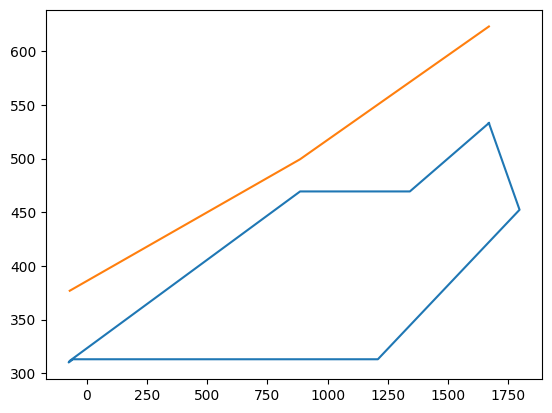

In [23]:
s=[sf1,sf2,sf2sv,sf2sl,sf3,sf4,sf4sl,sf4sv,sf1]
Tf=[Tf1,Tf2,Tf2sv,Tf2sl, Tf3, Tf4, Tf4sl, Tf4sv,Tf1]
Ta=[Ta1, Tf4sl + pinch, Ta4]
S= [sf1, sf4sl, sf4]
plt.plot(s,Tf)
plt.plot(S,Ta)

# II. Etude du pincement du générateur

Pour cette question le cycle du fluide de travail est identique à celui de la question 1. Seul le cycle de l’air est modifié de sorte que le pincement dans l’échangeur soit différent. Le pincement n’est plus de 30 K° mais est de 15 K°. Ainsi, le débit du fluide de travail n’est plus le même, ce qui modifie la puissance de la turbine et le rendement du cycle.

In [25]:
pinch2 = 15

   ### $\underline{1. \ \ Calcul \ \ du\ \ débit \ \ du\ \ fluide\ \ :}$
   m ̇_fluide=(m ̇_air c_A (T_(A_(4,sl) )-T_(A_1 ) ))/((h_(4,sl)-h_1 ) )

In [26]:
mf2 = ma*ca*(Tf4sl + pinch2 - Ta1)/(hf4sl - hf1)
print(f"mf={mf2}")

mf=0.387783490032172


   ### $\underline{2. \ \ Calcul \ \ de\ \ la \ \ puissance \ \ produite \ \ nette\ \ :}$
   W_produit=〖- m ̇〗_fluide (h_2-h_1 )-〖 m ̇〗_fluide (h_4-h_3 )

In [28]:
W_T_2 = mf2 * (hf1 - hf2)
W_P_2 = mf2 * (hf4 - hf3)

Pnette_2 = W_T_2 - W_P_2

print(f" la puissance nette est : P={Pnette_2}")

 la puissance nette est : P=48510.310749701275


   ### $\underline{3. \ \ Calcul \ \ du\ \ rendement \ \ du \ \ cycle \ \  :}$


La puissance thermique du cycle est modifié

Q ̇_reçu= m ̇_fluide (h_1-h_4 )≥0
Q ̇_reçu=292 kW

Donc
η_cycle=W_produit/Q ̇_reçu 


In [29]:
Q_2 = mf2*(hf1-hf4)

eta_cycle_2 =  Pnette_2 / Q_2
print(f" le rendement du cycle vaut : {eta_cycle_2}" )

 le rendement du cycle vaut : 0.16632697364941493


   ### $\underline{4. \ \ Analyse \ \ de\ \ ce \ \ nouveau \ \ pincement \ \  :}$

Avec un pincement plus faible dans l’échangeur de courant, on observe une puissance produite plus importante.

W_(produit,15)=48 kW≥W_(produit,30)=43,3 kW 

Cependant, l’apport énergétique est bien plus faible dans le cas d’un pincement plus faible.

Q_(reçu,15)=292 kW≥Q_(reçu,30)=260 kW

En diminuant le pincement, on refroidit davantage l’air donc le fluide reçoit plus d’énergie., et en produit plus au niveau de la turbine. Finalement en terme de rendement cela revient au même.


# Ajout du cycle basse température

In [31]:
fluids = [
    '1-Butene',
    'Acetone',
    'Air',
    'Ammonia',
    'Argon',
    'Benzene',
    'CarbonDioxide',
    'CarbonMonoxide',
    'CarbonylSulfide',
    'CycloHexane',
    'CycloPropane',
    'Cyclopentane',
    'D4',
    'D5',
    'D6',
    'Deuterium',
    'Dichloroethane',
    'DiethylEther',
    'DimethylCarbonate',
    'DimethylEther',
    'Ethane',
    'Ethanol',
    'EthylBenzene',
    'Ethylene',
    'EthyleneOxide',
    'Fluorine',
    'HFE143m',
    'HeavyWater',
    'Helium',
    'Hydrogen',
    'HydrogenChloride',
    'HydrogenSulfide',
    'IsoButane',
    'IsoButene',
    'Isohexane',
    'Isopentane',
    'Krypton',
    'MD2M',
    'MD3M',
    'MD4M',
    'MDM',
    'MM',
    'Methane',
    'Methanol',
    'MethylLinoleate',
    'MethylLinolenate',
    'MethylOleate',
    'MethylPalmitate',
    'MethylStearate',
    'Neon',
    'Neopentane',
    'Nitrogen',
    'NitrousOxide',
    'Novec649',
    'OrthoDeuterium',
    'OrthoHydrogen',
    'Oxygen',
    'ParaDeuterium',
    'ParaHydrogen',
    'Propylene',
    'Propyne',
    'R11',
    'R113',
    'R114',
    'R115',
    'R116',
    'R12',
    'R123',
    'R1233zd(E)',
    'R1234yf',
    'R1234ze(E)',
    'R1234ze(Z)',
    'R124',
    'R1243zf',
    'R125',
    'R13',
    'R134a',
    'R13I1',
    'R14',
    'R141b',
    'R142b',
    'R143a',
    'R152A',
    'R161',
    'R21',
    'R218',
    'R22',
    'R227EA',
    'R23',
    'R236EA',
    'R236FA',
    'R245ca',
    'R245fa',
    'R32',
    'R365MFC',
    'R40',
    'R404A',
    'R407C',
    'R41',
    'R410A',
    'R507A',
    'RC318',
    'SES36',
    'SulfurDioxide',
    'SulfurHexafluoride',
    'Toluene',
    'Water',
    'Xenon',
    'cis-2-Butene',
    'm-Xylene',
    'n-Butane',
    'n-Decane',
    'n-Dodecane',
    'n-Heptane',
    'n-Hexane',
    'n-Nonane',
    'n-Octane',
    'n-Pentane',
    'n-Propane',
    'n-Undecane',
    'o-Xylene',
    'p-Xylene',
    'trans-2-Butene'
]

Le fluide choisi doit respecter certaines contraintes:
- une température critique inférieure à la température d'entrée de l'air mais le plus proche possible
- il doit avoir un potentiel de réchauffement climatique (GWP) inférieur à 1000


In [136]:
df = pd.DataFrame(fluids, columns = ['fluid'])

def newcolumn(df,property,n):
    df[property] = 1
    for i in range(len(df)):
        df.iloc[i,n] = CP.PropsSI(property, df.iloc[i,0])
        

properties = ['Tcrit','pcrit']

for (i,property) in enumerate(properties):
    newcolumn(df,property,i+1)


df2 = df[(df['Tcrit']-Tf4sl-pinch < 0)&(df['Tcrit']-Tf4sl-pinch > -60)]
fluids_1=df2["fluid"]

In [137]:
df2

,fluid,Tcrit,pcrit
17,DiethylEther,466.700,3.649017e+06
24,EthyleneOxide,468.920,7.304686e+06
34,Isohexane,497.700,3.040000e+06
35,Isopentane,460.350,3.378000e+06
53,Novec649,441.810,1.869027e+06
61,R11,471.060,4.394000e+06
62,R113,487.210,3.392200e+06
67,R123,456.831,3.672000e+06
68,R1233zd(E),439.600,3.623638e+06
79,R141b,477.500,4.212000e+06


In [132]:
print(CP.PropsSI('R113', 'GWP100'),
CP.PropsSI('R141b', 'GWP100'),CP.PropsSI('R11', 'GWP100'),CP.PropsSI('R123', 'GWP20'),
      CP.PropsSI('R21', 'GWP20'),CP.PropsSI('R365MFC', 'GWP20'),       CP.PropsSI('SES36', 'GWP20') )

6130.0 725.0 4750.0 273.0 530.0 2520.0 7310.0


3 possibilités pour le fluide 1 :
    -R141B
    -R123
    -R21

In [150]:
df3 = df[(df['Tcrit']-Ta4  < 0) & (df['Tcrit']-Ta4  > -60)]
fluids_2=df3["fluid"]

df3['GWP'] = 1
for i in range(len(df3)):
    if i <3 or i >17:    
        df3.iloc[i,3] = 0
    else :
        df3.iloc[i,3] = CP.PropsSI('GWP100',df3.iloc[i,0])
        
df4=df3[(df3['GWP']<1000)&(df3['GWP']>0)]
df4

C:\Users\33626\AppData\Local\Temp\ipykernel_27436\3043542525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['GWP'] = 1


,fluid,Tcrit,pcrit,GWP
69,R1234yf,367.850,3382200.0,4
83,R161,375.250,5010000.0,10
93,R32,351.255,5782000.0,675
98,R41,317.280,5897000.0,92
